# Read in and Combine Data

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoCV, Lasso, LogisticRegression, RidgeCV, Ridge, ElasticNetCV, ElasticNet, LogisticRegressionCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error, log_loss, accuracy_score

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
red = pd.read_csv('/content/winequality-red.csv', sep=';')
white = pd.read_csv('/content/winequality-white.csv', sep=';')

In [3]:
red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


* Since each dataset has the same number and types of features, they can be combined.
* After merging, it would no longer be possible to distinguish between white and red.
* To ensure differentiation after merging, a new feature is added to each dataset.
* A column with a value of 0 is added for red, and a column with a value of 1 is added for white, allowing distinction even after merging.

In [5]:
# A new variable, 'type', is added: red is assigned 0, and white is assigned 1.
red['type'] = 0
white['type'] = 1

In [6]:
# The two dataframes are merged into a single dataframe.
wine_data = pd.concat([red, white], axis=0, ignore_index=True)

In [7]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


In [8]:
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.753886
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,1.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,1.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


#  Split the Data

In [9]:
X_train, X_test, y_train, y_test = train_test_split(wine_data.drop("alcohol", axis = 1),
                                                    wine_data["alcohol"],  # set target
                                                    test_size=0.20,
                                                    random_state=42,
                                                    stratify = wine_data["type"]
                                                    )

In [10]:
# The proportion of red and white samples in each dataset is checked.
print(X_train['type'].value_counts())
print(X_test['type'].value_counts())

type
1    3918
0    1279
Name: count, dtype: int64
type
1    980
0    320
Name: count, dtype: int64


# Regression Task (alcohol as Response)

### Train Models

 #### Fit four different multiple linear regression models.
   - At least one should include interaction term
   - At least one should include some polynomial terms (you may want to standardize your predictors
 but that is up to you)
   - Use CV to select your best MLR model

1. Standard model

In [11]:
mlr_reg = LinearRegression()

In [12]:
cv1 = cross_validate(mlr_reg,
                     X_train,
                     y_train,
                     cv=5,
                     scoring='neg_mean_squared_error'
                     )

# Calculate the average RMSE
rmse_scores1 = np.sqrt(-cv1['test_score'])

2. Standard model (standardize predictors)

In [13]:
means = X_train.apply(np.mean, axis = 0)
stds = X_train.apply(np.std, axis = 0)
X_train_reg = X_train.apply(lambda x: (x-np.mean(x))/np.std(x), axis = 0)

In [14]:
cv2 = cross_validate(mlr_reg,
                     X_train_reg,
                     y_train,
                     cv=5,
                     scoring='neg_mean_squared_error'
                     )

# Calculate the average RMSE
rmse_scores2 = np.sqrt(-cv2['test_score'])

3. Including interaction terms

In [15]:
poly = PolynomialFeatures(interaction_only=True, include_bias=False)
X_train_poly1 = poly.fit_transform(X_train)

In [16]:
cv3 = cross_validate(mlr_reg,
                     X_train_poly1,
                     y_train,
                     cv=5,
                     scoring='neg_mean_squared_error'
                     )

rmse_scores3 = np.sqrt(-cv3['test_score'])

4. Including polynomial terms

In [17]:
poly2 = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly2 = poly2.fit_transform(X_train)

In [18]:
cv4 = cross_validate(mlr_reg,
                     X_train_poly2,
                     y_train,
                     cv=5,
                     scoring='neg_mean_squared_error'
                     )

rmse_scores4 = np.sqrt(-cv4['test_score'])

#### Select Best MLR model
* As a result of comparing the four models, the model that **included polynomial terms** showed the best performance. Therefore, this model was selected as the best model.
* Regularization of the predictors has been found to have little impact on improving model performance.

In [19]:
print("Standard model:", np.mean(rmse_scores1))
print("Standard model with Regularization:", np.mean(rmse_scores2))
print("Including interaction terms:", np.mean(rmse_scores3))
print("Including polynomial terms:", np.mean(rmse_scores4))

Standard model: 0.5086429219515878
Standard model with Regularization: 0.508642921951591
Including interaction terms: 0.461451793054533
Including polynomial terms: 0.41790369500739655


#### LASSO model

In [20]:
lasso_cv = LassoCV(cv=5, random_state=42, max_iter=500)
lasso_cv.fit(X_train, y_train)

LassoCV(cv=5, max_iter=500, random_state=42)

In [21]:
lasso = Lasso(alpha=lasso_cv.alpha_)
lasso_best = lasso.fit(X_train, y_train)

#### Ridge Regression model

In [22]:
ridge_cv = RidgeCV(cv=5, scoring='neg_mean_squared_error')
ridge_cv.fit(X_train, y_train)

RidgeCV(cv=5, scoring='neg_mean_squared_error')

In [23]:
ridge = Ridge(alpha=ridge_cv.alpha_)
ridge_best = ridge.fit(X_train, y_train)

#### Elastic Net model

In [24]:
elastic_net_cv = ElasticNetCV(cv=5, random_state=42, n_alphas = 50,
                              l1_ratio = [0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.96, 0.98, 0.99, 1])
elastic_best = elastic_net_cv.fit(X_train, y_train)

### Test Models

Multiple Linear Regression models

In [25]:
X_test_poly = poly2.fit_transform(X_test)

In [26]:
mlr_reg = LinearRegression()
mlr_reg.fit(X_train_poly2, y_train)
y_pred_mlr = mlr_reg.predict(X_test_poly)

rmse_mlr = np.sqrt(mean_squared_error(y_test, y_pred_mlr))
mae_mlr = mean_absolute_error(y_test, y_pred_mlr)

LASSO

In [27]:
y_pred_lasso = lasso_best.predict(X_test)

mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))

Ridge Regression model

In [28]:
y_pred_ridge = ridge_best.predict(X_test)

mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))

Elastic Net model

In [29]:
y_pred_elastic = elastic_best.predict(X_test)

mae_elastic = mean_absolute_error(y_test, y_pred_elastic)
rmse_elastic = np.sqrt(mean_squared_error(y_test, y_pred_elastic))

In [30]:
mae_values = [mae_mlr, mae_lasso, mae_ridge, mae_elastic]
rmse_values = [rmse_mlr, rmse_lasso, rmse_ridge, rmse_elastic]

print("MAE values:", mae_values)
print("RMSE values:", rmse_values)

MAE values: [0.30695974034547946, 0.7400857117377325, 0.6831929905195219, 0.7400857117377325]
RMSE values: [np.float64(0.44330994033258314), np.float64(0.9305932130385012), np.float64(0.8586169050435691), np.float64(0.9305932130385012)]


* The multiple linear regression model is considered to have the best performance.

#  Classification Task (Wine Type as Response)

In [46]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(wine_data.drop("type", axis = 1),
                                                    wine_data["type"],
                                                    test_size=0.20,
                                                    random_state=42,
                                                    stratify = wine_data["type"]
                                                    )

1. Standard model

In [47]:
log_reg = LogisticRegression(max_iter=2000)

In [48]:
cv_class_1 = cross_validate(log_reg,
                     X_train,
                     y_train,
                     cv=5,
                     scoring='neg_log_loss'
                     )

2. Standard model (standardize predictors)

In [49]:
means = X_train.apply(np.mean, axis = 0)
stds = X_train.apply(np.std, axis = 0)
X_train_reg = X_train.apply(lambda x: (x-np.mean(x))/np.std(x), axis = 0)

In [50]:
cv_class_2 = cross_validate(log_reg,
                            X_train_reg,
                            y_train,
                            cv=5,
                            scoring='neg_log_loss'
                            )

3. Including interaction terms

In [51]:
poly = PolynomialFeatures(interaction_only=True, include_bias=False)
X_train_poly1 = poly.fit_transform(X_train_reg)

In [52]:
cv_class_3 = cross_validate(log_reg,
                            X_train_poly1,
                            y_train,
                            cv=5,
                            scoring='neg_log_loss'
                            )

4. Including polynomial terms

In [53]:
poly2 = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly2 = poly2.fit_transform(X_train_reg)

In [54]:
cv_class_4 = cross_validate(log_reg,
                            X_train_poly2,
                            y_train,
                            cv=5,
                            scoring='neg_log_loss'
                            )

#### Select Best Logistic Regression model
* Among the Logistic Regression models, the one including interaction terms showed the best performance.
* Standard Logistic Regression only considers the independent effect of each variable.
* However, interaction terms allow the model to recognize synergistic effects and combined patterns between variables, enabling more accurate probability predictions.

In [55]:
print("Standard model:", round(cv_class_1['test_score'].mean(),4))
print("Standard model with Regularization:", round(cv_class_2['test_score'].mean(),4))
print("Including interaction terms:", round(cv_class_3['test_score'].mean(),4))
print("Including polynomial terms:", round(cv_class_4['test_score'].mean(),4))

Standard model: -0.0641
Standard model with Regularization: -0.0443
Including interaction terms: -0.0331
Including polynomial terms: -0.0358


#### LASSO

In [56]:
lasso_cv = LogisticRegressionCV(penalty='l1',
                                solver='liblinear',
                                cv=5,
                                scoring='neg_log_loss',
                                max_iter=1000,
                                random_state=42
                                )

lasso_cv.fit(X_train, y_train)
lasso_best = lasso_cv

#### Ridge Regression model

In [57]:
ridge_cv = LogisticRegressionCV(penalty='l2',
                                solver='lbfgs',
                                cv=5,
                                scoring='neg_log_loss',
                                max_iter=2000,
                                random_state=42
                                )

ridge_cv.fit(X_train, y_train)

LogisticRegressionCV(cv=5, max_iter=2000, random_state=42,
                     scoring='neg_log_loss')

In [58]:
ridge_best = ridge_cv

#### Elastic Net model

In [59]:
# Applied feature standardization to address convergence warnings
# and improve training stability in the Elastic Net model
elastic_cv = LogisticRegressionCV(penalty='elasticnet',
                                  solver='saga',
                                  l1_ratios=np.linspace(0.1, 1.0, 10),
                                  Cs=np.logspace(-4, 4, 10),
                                  cv=5,
                                  scoring='neg_log_loss',
                                  max_iter=1000,
                                  random_state=42
                                  )

elastic_cv.fit(X_train_reg, y_train)
elastic_best = elastic_cv

### TEST Models

In [60]:
X_test_reg = (X_test - means) / stds

In [61]:
X_test_poly = poly.fit_transform(X_test_reg)

In [62]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_poly1, y_train)
y_pred_log = log_reg.predict(X_test_poly)
y_pred_proba = log_reg.predict_proba(X_test_poly)

acc = accuracy_score(y_test, y_pred_log)
logloss = log_loss(y_test, y_pred_proba)

LASSO

In [63]:
y_pred_lasso = lasso_best.predict(X_test)
y_pred_proba_lasso = lasso_best.predict_proba(X_test)

lasso_acc = accuracy_score(y_test, y_pred_lasso)
lasso_logloss = log_loss(y_test, y_pred_proba_lasso)

Ridge Regression model

In [64]:
y_pred_ridge = ridge_best.predict(X_test)
y_pred_proba_ridge = ridge_best.predict_proba(X_test)

ridge_acc = accuracy_score(y_test, y_pred_ridge)
ridge_logloss = log_loss(y_test, y_pred_proba_ridge)

Elastic Net model

In [65]:
y_pred_elastic = elastic_best.predict(X_test_reg)
y_pred_proba_elastic = elastic_best.predict_proba(X_test_reg)

elastic_acc = accuracy_score(y_test, y_pred_elastic)
elastic_logloss = log_loss(y_test, y_pred_proba_elastic)

In [66]:
acc_values = [acc, lasso_acc, ridge_acc, elastic_acc]
logloss_values = [logloss, lasso_logloss, ridge_logloss, elastic_logloss]

print("acc values:", acc_values)
print("logloss values:", logloss_values)

acc values: [0.9961538461538462, 0.9876923076923076, 0.9892307692307692, 0.9961538461538462]
logloss values: [0.014885418597895566, 0.037771628743475436, 0.037137825288626754, 0.02196629123583699]


* The standard logistic regression model showed high accuracy, but its log-loss was relatively higher, indicating less confidence in probability predictions.
* The Elastic Net model achieved the lowest log-loss, demonstrating the best performance in both classification accuracy and calibrated probability estimates.
* While Lasso and Ridge were effective for feature selection and overfitting prevention respectively, Elastic Net provided the most balanced overall performance.

# Homework 8

### Regression Task (alcohol as Response)

#####Train model : regression tree

In [31]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [32]:
X_train, X_test, y_train, y_test = train_test_split(wine_data.drop("alcohol", axis = 1),
                                                    wine_data["alcohol"],  # set target
                                                    test_size=0.20,
                                                    random_state=42,
                                                    stratify = wine_data["type"]
                                                    )

In [33]:
parameters = {'max_depth': range(2,15),
              'min_samples_leaf':[3, 5, 10, 50, 100]}

In [34]:
tuning_model = GridSearchCV(DecisionTreeRegressor(),
                            parameters,
                            cv = 5,
                            scoring='neg_mean_squared_error')

In [35]:
tuning_model.fit(X_train,
                 y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': range(2, 15),
                         'min_samples_leaf': [3, 5, 10, 50, 100]},
             scoring='neg_mean_squared_error')

In [36]:
print(tuning_model.best_estimator_)

DecisionTreeRegressor(max_depth=14, min_samples_leaf=10)


In [37]:
print(tuning_model.best_score_, tuning_model.best_params_)

-0.29834286770727975 {'max_depth': 14, 'min_samples_leaf': 10}


##### Train model : random forest model

In [38]:
parameters = {"max_features": range(1,4), "max_depth": [3, 4, 5, 10, 15],'min_samples_leaf':[3, 10, 50, 100]}

In [39]:
rf_tune = GridSearchCV(RandomForestRegressor(n_estimators = 500),
                       parameters, cv = 5, scoring = "neg_mean_squared_error")

In [40]:
rf_tune.fit(X_train,
                 y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(n_estimators=500),
             param_grid={'max_depth': [3, 4, 5, 10, 15],
                         'max_features': range(1, 4),
                         'min_samples_leaf': [3, 10, 50, 100]},
             scoring='neg_mean_squared_error')

In [41]:
print(rf_tune.best_score_, rf_tune.best_params_)

-0.23862393968567935 {'max_depth': 15, 'max_features': 3, 'min_samples_leaf': 3}


##### Test models : regression tree

In [42]:
# Get the best model
best_dt_model = tuning_model.best_estimator_

# Predict on the test set
y_pred = tuning_model.predict(X_test)

In [43]:
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred))
mae_dt = mean_absolute_error(y_test, y_pred)

##### Test models : random forest model

In [44]:
best_rf_model = rf_tune.best_estimator_
y_pred = rf_tune.predict(X_test)

rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred))
mae_rf = mean_absolute_error(y_test, y_pred)

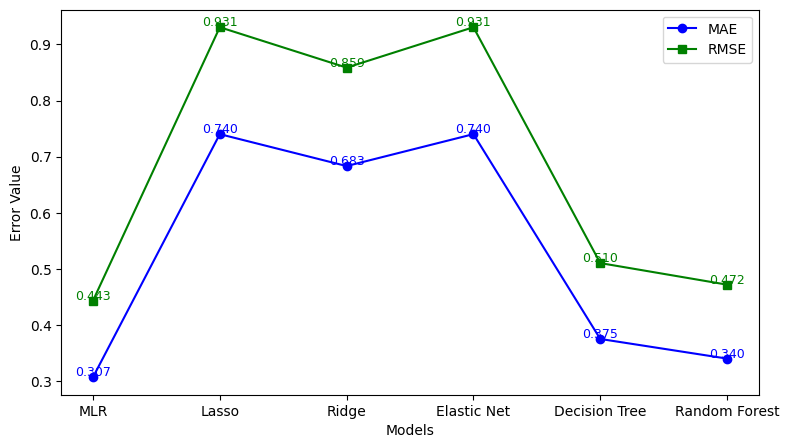

In [45]:
# Model name
x = ['MLR', 'Lasso', 'Ridge', 'Elastic Net', 'Decision Tree', 'Random Forest']
mae_values = [mae_mlr, mae_lasso, mae_ridge, mae_elastic, mae_dt, mae_rf]
rmse_values = [rmse_mlr, rmse_lasso, rmse_ridge, rmse_elastic, rmse_dt, rmse_rf]

plt.figure(figsize=(9, 5))
plt.plot(x, mae_values, marker='o', label='MAE', color='blue')
plt.plot(x, rmse_values, marker='s', label='RMSE', color='green')
plt.xlabel('Models')
plt.ylabel('Error Value')

# Show value labels on the plot
for i in range(len(x)):
    plt.text(x[i], mae_values[i] + 0.002, f'{mae_values[i]:.3f}', ha='center', color='blue', fontsize=9)
    plt.text(x[i], rmse_values[i] + 0.002, f'{rmse_values[i]:.3f}', ha='center', color='green', fontsize=9)

plt.legend()
plt.show()

* Multiple Linear Regression (MLR) demonstrated the lowest MAE and RMSE values, suggesting that a simple linear model fits the data best in this case.
* Random Forest also showed strong performance, comparable to MLR, indicating its ability to capture complex nonlinear patterns effectively.
* Lasso and Elastic Net resulted in the highest errors, which may imply that excessive regularization limited the model’s ability to capture the underlying relationships in the data.
* Decision Tree performed reasonably well, better than Lasso and Ridge, and likely benefited from capturing simple nonlinear splits in the dataset.

### Classification Task (Wine Type as Response)

In [67]:
X_train, X_test, y_train, y_test = train_test_split(wine_data.drop("type", axis = 1),
                                                    wine_data["type"],
                                                    test_size=0.20,
                                                    random_state=42,
                                                    stratify = wine_data["type"]
                                                    )

#####Train model : regression tree

In [68]:
parameters = {'max_depth': range(2,15),
              'min_samples_leaf':[3, 5, 10, 50, 100]}

In [69]:
dt_model = GridSearchCV(DecisionTreeClassifier(),
                            parameters,
                            cv = 5,
                            scoring='neg_mean_squared_error')

In [70]:
dt_model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(2, 15),
                         'min_samples_leaf': [3, 5, 10, 50, 100]},
             scoring='neg_mean_squared_error')

In [71]:
print(dt_model.best_score_, dt_model.best_params_)

-0.01885855482342489 {'max_depth': 12, 'min_samples_leaf': 3}


##### Train model : random forest model

In [72]:
from sklearn.ensemble import RandomForestClassifier

In [73]:
parameters = {"max_features": range(1,4), "max_depth": [3, 4, 5, 10, 15],'min_samples_leaf':[3, 10, 50, 100]}

In [74]:
rf_class = GridSearchCV(RandomForestClassifier(n_estimators = 500),
                       parameters, cv = 5, scoring = "neg_mean_squared_error")

In [75]:
rf_class.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_estimators=500),
             param_grid={'max_depth': [3, 4, 5, 10, 15],
                         'max_features': range(1, 4),
                         'min_samples_leaf': [3, 10, 50, 100]},
             scoring='neg_mean_squared_error')

In [76]:
print(rf_class.best_score_, rf_class.best_params_)

-0.005965055156585474 {'max_depth': 15, 'max_features': 2, 'min_samples_leaf': 3}


##### Test models : regression tree

In [77]:
best_dt_model = dt_model.best_estimator_
y_pred_dt = best_dt_model.predict(X_test)
y_pred_proba_dt = best_dt_model.predict_proba(X_test)

dt_acc = accuracy_score(y_test, y_pred_dt)
dt_logloss = log_loss(y_test, y_pred_proba_dt)

##### Test models : random forest model

In [78]:
best_rf_model = rf_class.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)
y_pred_proba_rf = best_rf_model.predict_proba(X_test)

rf_acc = accuracy_score(y_test, y_pred_rf)
rf_logloss = log_loss(y_test, y_pred_proba_rf)

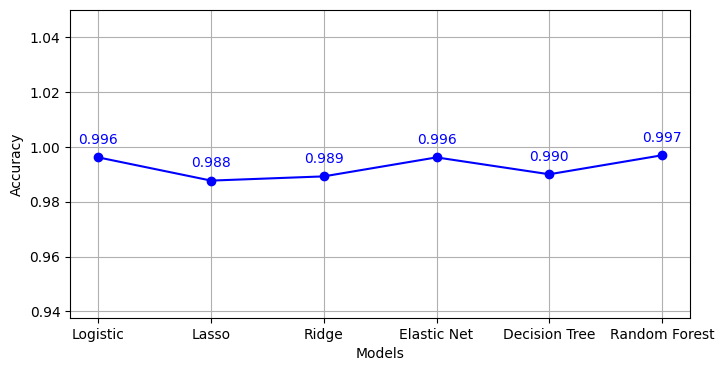

In [84]:
x = ['Logistic', 'Lasso', 'Ridge', 'Elastic Net', 'Decision Tree', 'Random Forest']
acc_values = [acc, lasso_acc, ridge_acc, elastic_acc, dt_acc, rf_acc]
logloss_values = [logloss, lasso_logloss, ridge_logloss, elastic_logloss, dt_logloss, rf_logloss]

plt.figure(figsize=(8, 4))
plt.plot(x, acc_values, marker='o', color='blue', label='Accuracy')
plt.xlabel('Models')
plt.ylabel('Accuracy')

for i in range(len(x)):
    plt.text(x[i], acc_values[i] + 0.005, f'{acc_values[i]:.3f}', ha='center', color='blue')

plt.ylim(min(acc_values) - 0.05, 1.05)
plt.grid(True)
plt.show()

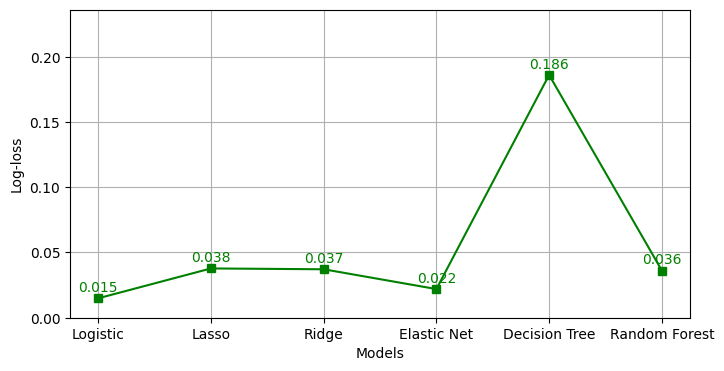

In [85]:
plt.figure(figsize=(8, 4))
plt.plot(x, logloss_values, marker='s', color='green', label='Log-loss')
plt.xlabel('Models')
plt.ylabel('Log-loss')

for i in range(len(x)):
    plt.text(x[i], logloss_values[i] + 0.005, f'{logloss_values[i]:.3f}', ha='center', color='green')

plt.ylim(0, max(logloss_values) + 0.05)
plt.grid(True)
plt.show()

* The Elastic Net and Logistic Regression models achieved both high accuracy and low log-loss, demonstrating the most reliable overall performance.
* Although the Random Forest model recorded the highest accuracy, its relatively higher log-loss suggests lower precision in probability predictions.
* The Decision Tree model showed high accuracy but the highest log-loss, indicating it may be unsuitable for probability-based decision making.